### forward propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_class = 500 # 500 samples per class

In [20]:
X1 = np.random.randn(n_class, 2) + np.array([0, -2]) # 500 dots centered around coordinates {0,-2} (x=0, y=-2)
X2 = np.random.randn(n_class, 2) + np.array([2, 2])
X3 = np.random.randn(n_class, 2) + np.array([-2, 2])

X = np.vstack([X1,X2,X3])
X

array([[ 2.25379898, -2.22649835],
       [-0.29063454, -3.08270766],
       [-1.36543187, -3.18130928],
       ...,
       [-2.84510428,  2.21106227],
       [-3.65819121,  1.09138354],
       [-2.07318952,  1.74068324]])

In [35]:
Y = np.array([0]*n_class + [1]*n_class + [2]*n_class) # generate labels (X1=0, X2=1, X3=2)
Y

array([0, 0, 0, ..., 2, 2, 2])

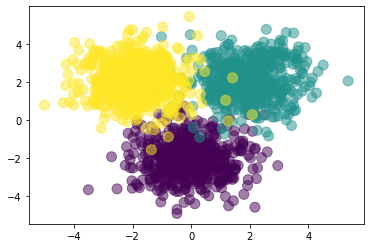

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [21]:
D=2 # features
M=3 # hidden nodes in 1st hidden layer
K=3 # number of classes

In [23]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [27]:
def forward(X, W1, b1, W2, b2):
    Z = 1/(1+np.exp(-X.dot(W1)-b1)) # value of hidden nodes
    A = Z.dot(W2)+b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True) # otput nodes
    return Y

In [33]:
def classification_rate(Y,P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i]==P[i]:
            n_correct +=1
    return float(n_correct)/n_total

In [31]:
P_y_given_x = forward(X, W1, b1, W2, b2)
predictions = np.argmax(P_y_given_x, axis=1)
predictions

array([2, 1, 1, ..., 2, 1, 2], dtype=int64)

In [40]:
is_ok = (len(Y)==len(predictions))
is_ok

True

In [34]:
result = classification_rate(Y,predictions)
result

0.26266666666666666